# Optimization of modeling parameters

## Load previous data

In [1]:
from pytadbit import load_chromosome

In [2]:
crm = load_chromosome('results/crm18.tdb')

In [3]:
hindiii, mboi = crm.experiments

In [4]:
hindiii

Experiment HindIII (resolution: 100 kb, TADs: 57, Hi-C rows: 804, normalized: None)

Load raw data matrices, and normalized matrices

In [5]:
hindiii.load_hic_data('results/HindIII/04_normalizing/100000_raw/chr18.mat')
hindiii.load_norm_data('results/HindIII/04_normalizing/100000_norm/chr18.mat')

mboi.load_hic_data('results/MboI/04_normalizing/100000_raw/chr18.mat')
mboi.load_norm_data('results/MboI/04_normalizing/100000_norm/chr18.mat')

/home/student/.miniconda2/lib/python2.7/site-packages/pytadbit/parsers/hic_parser.py:247: UserWarning: WARNING: matrix not symmetric: summing cell_ij with cell_ji
  warn('WARNING: matrix not symmetric: summing cell_ij with cell_ji')


Check that the data is there:

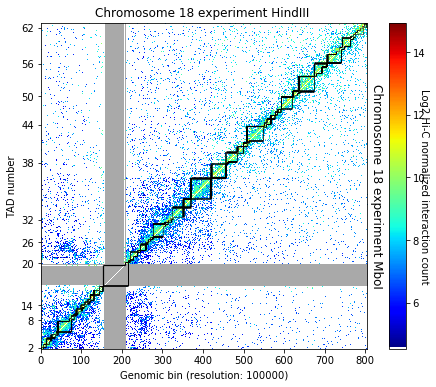

In [6]:
crm.visualize([('HindIII', 'MboI')], normalized=True, paint_tads=True)

Decide which region to model.

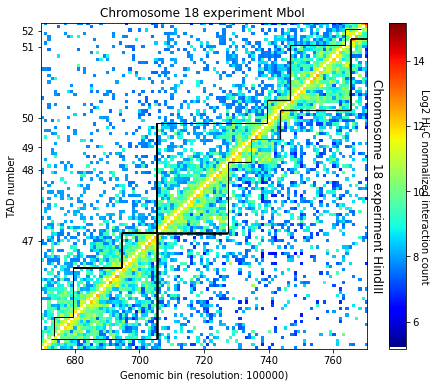

In [7]:
crm.visualize([('MboI', 'HindIII')], normalized=True, paint_tads=True, focus=(670, 770))

## Optimization of parameters

We are going to optimize these parameters for both experiments:
 - maxdit: maximum distance associated to the minimum amount of interactions
 - upfreq: minimum amount of interactions that defines attraction
 - lowfreq: maximum number of interactions that defines repulsion
 - dcutoff: the definition of "contact" in units of bead diameter. Value of 2 means that a contact will occur when 2 beads are closer than 2 times their diameter. This will be used to compare 3D models with Hi-C interaction maps.

In [ ]:
opt_hindiii = hindiii.optimal_imp_parameters(start=685, end=750, n_models=40, n_keep=20, n_cpus=8, 
                                   upfreq_range=(0, 0.6, 0.3),
                                   lowfreq_range=(-0.9, 0, 0.3),
                                   maxdist_range=(1000, 2000, 500), 
                                   dcutoff_range=[1.5, 2, 2.5])

Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.9    1000   0.01       2  0.7223
    2      0    -0.6    1000   0.01       2  0.7308
    3      0    -0.3    1000   0.01       2  0.7226
    4      0       0    1000   0.01       2  0.7439
    5    0.3    -0.9    1000   0.01       2  0.7084
    6    0.3    -0.6    1000   0.01       2  0.7099
    7    0.3    -0.3    1000   0.01       2  0.704
    8    0.3       0    1000   0.01       2  0.7109
    9    0.6    -0.9    1000   0.01       2  0.6918
   10    0.6    -0.6    1000   0.01       2  0.6948
   11    0.6    -0.3    1000   0.01       2  0.6817
   12    0.6       0    1000   0.01       2  0.6793
   13      0    -0.9    1500   0.01       2  0.7426
   14      0    -0.6    1500   0.01       2  0.7516
   15      0    -0.3    1500   0.01       2  0.7551
   16      0       0    1500   0.01       2  0.7452
   17    0.3    -0.9    1500   0.01       2  0.7364
   18    0.3    -0.6    1500   0.01       2  0.7354
   19    0.3    -0.3    1500   0.01       2  0.7331
   20    0.3 

In [ ]:
opt_hindiii.plot_2d(show_best=5)

Refine optimization in a small region:

In [22]:
opt_hindiii.run_grid_search(upfreq_range=(0, 0.3, 0.3), lowfreq_range=(-0.6, -0.3, 0.3),
                       maxdist_range=[1750], 
                       dcutoff_range=[1.5, 2],
                       n_cpus=8)

Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.6    1750   0.01       2  0.7505
    2      0    -0.3    1750   0.01       2  0.7382
    3    0.3    -0.6    1750   0.01       2  0.7462
    4    0.3    -0.3    1750   0.01       2  0.7464


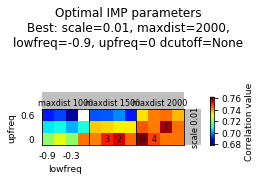

In [11]:
opt_hindiii.plot_2d(show_best=5)

In [12]:
opt_hindiii.run_grid_search(upfreq_range=(0, 0.3, 0.3), lowfreq_range=(-0.3, 0, 0.1),
                       maxdist_range=[2000, 2250], 
                       dcutoff_range=[1.5, 2],
                       n_cpus=8)

   xx      0    -0.3    2000   0.01       2  0.7436


Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.2    2000   0.01       2  0.7446
    2      0    -0.1    2000   0.01       2  0.7455
   xx      0       0    2000   0.01       2  0.7439
   xx    0.3    -0.3    2000   0.01     1.5  0.7588
    3    0.3    -0.2    2000   0.01     1.5  0.7606
    4    0.3    -0.1    2000   0.01     1.5  0.7559
   xx    0.3       0    2000   0.01     1.5  0.7441
    5      0    -0.3    2250   0.01     1.5  0.7546
    6      0    -0.2    2250   0.01     1.5  0.7516
    7      0    -0.1    2250   0.01     1.5  0.7643
    8      0       0    2250   0.01     1.5  0.7555
    9    0.3    -0.3    2250   0.01     1.5  0.7728
   10    0.3    -0.2    2250   0.01     1.5  0.7579
   11    0.3    -0.1    2250   0.01     1.5  0.7711
   12    0.3       0    2250   0.01     1.5  0.7607


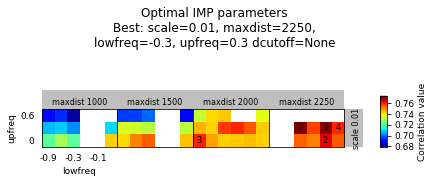

In [13]:
opt_hindiii.plot_2d(show_best=5)

In [14]:
opt_hindiii.run_grid_search(upfreq_range=(0, 0.3, 0.1), lowfreq_range=(-0.3, 0, 0.1),
                       n_cpus=8,
                       maxdist_range=[2000, 2250], 
                       dcutoff_range=[1.5, 2])

   xx      0    -0.3    2000   0.01       2  0.7436
   xx      0    -0.2    2000   0.01       2  0.7446
   xx      0    -0.1    2000   0.01       2  0.7455
   xx      0       0    2000   0.01       2  0.7439


Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1    0.1    -0.3    2000   0.01     1.5  0.7408
    2    0.1    -0.2    2000   0.01       2  0.7448
    3    0.1    -0.1    2000   0.01       2  0.7474
    4    0.1       0    2000   0.01     1.5  0.7474
    5    0.2    -0.3    2000   0.01     1.5  0.7421
    6    0.2    -0.2    2000   0.01     1.5  0.7522
    7    0.2    -0.1    2000   0.01       2  0.7438
    8    0.2       0    2000   0.01     1.5  0.7511
   xx    0.3    -0.3    2000   0.01     1.5  0.7588
   xx    0.3    -0.2    2000   0.01     1.5  0.7606
   xx    0.3    -0.1    2000   0.01     1.5  0.7559
   xx    0.3       0    2000   0.01     1.5  0.7441
   xx      0    -0.3    2250   0.01     1.5  0.7546
   xx      0    -0.2    2250   0.01     1.5  0.7516
   xx      0    -0.1    2250   0.01     1.5  0.7643
   xx      0       0    2250   0.01     1.5  0.7555
    9    0.1    -0.3    2250   0.01       2  0.7445
   10    0.1    -0.2    2250   0.01     1.5  0.7528
   11    0.1    -0.1    2250   0.01     1.5  0.7593
   12    0.1

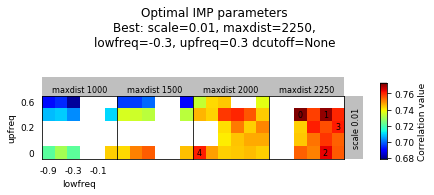

In [15]:
opt_hindiii.plot_2d(show_best=5)

In [ ]:
opt_hindiii.get_best_parameters_dict()

{'dcutoff': 1.5,
 'kforce': 5,
 'lowfreq': -0.3,
 'maxdist': 2250.0,
 'reference': '',
 'scale': 0.01,
 'upfreq': 0.3}

For the other replicate, we can reduce the space of search:

In [ ]:
opt_mboi = mboi.optimal_imp_parameters(start=685, end=750, n_models=40, n_keep=20, n_cpus=8, 
                                     upfreq_range=(0, 0.6, 0.3),
                                     lowfreq_range=(-0.9, -0.3, 0.3),
                                     maxdist_range=(1500, 2000, 500), 
                                     dcutoff_range=[1.5, 2])

Optimizing 66 particles
# num  upfrq  lowfrq maxdist  scale  cutoff    corr


    1      0    -0.9    1500   0.01       2  0.736


In [ ]:
opt_mboi.plot_2d(show_best=5)

In [ ]:
opt_mboi.get_best_parameters_dict()